### Deskripsi Bisnis
Sejak didirikan beberapa tahun yang lalu, toko perhiasan online ini telah mengalami perkembangan yang signifikan dan konsisten. Sebagai sebuah usaha berskala menengah, toko ini berkomitmen untuk menghadirkan produk-produk perhiasan berkualitas tinggi yang mencakup cincin, gelang, anting, kalung, liontin, dan beragam aksesori lainnya.

### Tujuan Analisis
Tujuan utama dari analisis cohort retention untuk Toko Perhiasan Online adalah untuk memahami pola retensi pelanggan berdasarkan kelompok waktu pembelian.

### Problem Statement

Bisnis perhiasan sangat bergantung pada loyalitas pelanggan, tren musiman, dan pemasaran yang tepat sasaran untuk meningkatkan penjualan. Namun, memahami bagaimana kelompok pelanggan tertentu (kohort) berperilaku dari waktu ke waktu sangat penting untuk mengidentifikasi pola retensi, segmen pelanggan bernilai tinggi, dan peluang pertumbuhan.

Dengan menggunakan dataset yang diberikan, proyek ini bertujuan untuk melakukan analisis kohort untuk menjawab pertanyaan utama berikut:
1. Berapa persentase pelanggan yang kembali melakukan pembelian setelah transaksi pertama mereka? Bagaimana tingkat retensi ini bervariasi antar kohort (misalnya, berdasarkan quartil saat mereka menjadi pelanggan)?

2. Apakah pelanggan yang membeli kategori produk tertentu (misalnya, cincin tunangan, kalung) menunjukkan tingkat retensi atau pola pengeluaran yang berbeda?

In [29]:
# import library dan modul yang diperlukan

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

import warnings
warnings.filterwarnings('ignore')


### Data Preparation

Tahap awal ini diperlukan agar kita mengenal dataset terlebih dahulu sebelum masuk ke tahap analisa. Dari tahap ini pula kita dapat menetukan langkah apa yang perlu dilakukan untuk menangani anomali-anomali data serta data kosong (null values).


Dataset ini berisi pembelian produk perhiasan dari sebuah toko perhiasan online berskala menengah, yang mencakup periode waktu dua tahun dan terdiri dari 95.911 produk yang dibeli. Setiap baris dalam dataset ini mewakili satu produk yang dibeli, dan produk-produk dari satu pesanan yang sama dapat diidentifikasi melalui ID pesanan (`order_id`).

Dataset ini mencakup informasi seperti:

- `date`: Tanggal pembelian produk.

- `order_id`: Nomor identifikasi unik untuk setiap pesanan.

- `product_id`: Nomor identifikasi unik untuk setiap produk.

- `quantity`: Jumlah unit produk yang dibeli dalam satu pesanan.

- `category_id`: Nomor identifikasi unik untuk kategori produk.

- `category_alias`: Nama atau alias dari kategori produk.

- `brand_id`: Nomor identifikasi unik untuk merek produk.

- `price`: Harga produk yang dibeli.

- `user_id`: Nomor identifikasi unik untuk setiap pengguna.

- `gender`: Jenis kelamin pengguna (misalnya, pria atau wanita).

- `color`: Warna produk perhiasan.

- `material`: Bahan dari produk perhiasan (misalnya, emas, perak, dsb).

- `stone`: Jenis batu permata yang digunakan dalam produk perhiasan.

**Menambah Header dan Mengganti tipe data**

Data pada awalnya belum memiliki *header*. Informasi *header* dari kaggle digunakan untuk menambahkan header pada dataframe. Tipe data pada tabel juga diperlukan untuk diubah, terutama kolom dengan data numerik yang bersifat ID atau kode, untuk dijadikan object.

In [30]:
colnames = ["date", "order_id", "product_id", "quantity", "category_id", "category_alias", "brand_id","price", "user_id", "gender", "color", "material", "stone"]
df = pd.read_csv('jewelry.csv', names=colnames, header=None, parse_dates=['date'], dtype={'user_id': object,'order_id': object,'product_id': object,'category_id': object,'product_id': object,'category_id': object,'brand_id': object})
df

,date,order_id,product_id,quantity,category_id,category_alias,brand_id,price,user_id,gender,color,material,stone
0,2018-12-01 11:40:29+00:00,1924719191579951782,1842195256808833386,1,1806829201890738522,jewelry.earring,0,561.51,1515915625207851155,NaN,red,gold,diamond
1,2018-12-01 17:38:31+00:00,1924899396621697920,1806829193678291446,1,1806829201848795479,NaN,NaN,212.14,1515915625071969944,NaN,yellow,gold,NaN
2,2018-12-02 13:53:42+00:00,1925511016616034733,1842214461889315556,1,1806829201915904347,jewelry.pendant,1,54.66,1515915625048493557,f,white,gold,sapphire
3,2018-12-02 17:44:02+00:00,1925626951238681511,1835566849434059453,1,1806829201915904347,jewelry.pendant,0,88.90,1515915625207630915,f,red,gold,diamond
4,2018-12-02 21:30:19+00:00,1925740842841014667,1873936840742928865,1,1806829201924292956,jewelry.necklace,0,417.67,1515915625175329378,NaN,red,gold,amethyst
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95906,2021-12-01 09:47:37+00:00,2719016587653808559,1515966223597820877,1,NaN,0.00,1515915625720366009,NaN,NaN,NaN,NaN,NaN,NaN
95907,2021-12-01 09:50:37+00:00,2719018098886705639,1956663830729720074,1,1806829201848795479,NaN,0,229.99,1515915625720367417,NaN,red,gold,NaN
95908,2021-12-01 09:52:06+00:00,2719018846999544322,1956663848219968336,1,1806829201890738522,jewelry.earring,1,630.00,1515915625720352091,f,white,gold,diamond
95909,2021-12-01 09:55:35+00:00,2719020596963836492,1835566854106513435,1,1806829201890738522,jewelry.earring,0,83.42,1515915625720369724,NaN,white,gold,fianit


### Null Values Handling

Untuk mengatasi data kosong, atau _null values_. Perlu dilakukan beberapa langkah, seperti melihat dimana dan berapa banyak data kosong, yang akan diatasi dengan menghilangkan (_drop_) atau meng-_impute_ sesuai dengan konteks data.

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95911 entries, 0 to 95910
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   date            95911 non-null  datetime64[ns, UTC]
 1   order_id        95911 non-null  object             
 2   product_id      95911 non-null  object             
 3   quantity        95911 non-null  int64              
 4   category_id     90559 non-null  object             
 5   category_alias  85978 non-null  object             
 6   brand_id        91126 non-null  object             
 7   price           90559 non-null  float64            
 8   user_id         90559 non-null  object             
 9   gender          47743 non-null  object             
 10  color           88251 non-null  object             
 11  material        90449 non-null  object             
 12  stone           61853 non-null  object             
dtypes: datetime64[ns, UTC](1), floa

In [32]:
display(df.describe(), df.describe(include='object'))

,quantity,price
count,95911.0,90559.000000
mean,1.0,362.215217
std,0.0,444.155706
min,1.0,0.990000
25%,1.0,145.620000
50%,1.0,258.770000
75%,1.0,431.370000
max,1.0,34448.600000


,order_id,product_id,category_id,category_alias,brand_id,user_id,gender,color,material,stone
count,95911,95911,90559,85978,91126,90559,47743,88251,90449,61853
unique,74760,9613,25,218,2547,32233,2,5,3,30
top,2421954597749784864,1956663847725040099,1806829201890738522,jewelry.earring,0,1515915625245642977,f,red,gold,diamond
freq,26,526,29001,29052,44600,1068,47379,69511,89082,29610


**Tabel Unique Values**

Untuk memudahkan melihat isi data di kolom-kolom tertentu, tabel _unique values_ dibuat. Dari tabel di bawah, terlihat bahwa ada data numerik pada kolom `category_alias` memiliki data numerik yang tidak sesuai dengan data lainnya pada kolom itu yaitu kategorikal.

In [33]:
pd.set_option('display.max_colwidth', None)
listItem = []
listcolumns = ['category_alias', 'gender', 'color', 'material', 'stone']
for col in listcolumns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,category_alias,218,"[jewelry.earring, nan, jewelry.pendant, jewelry.necklace, jewelry.ring, jewelry.brooch, jewelry.bracelet, electronics.clocks, jewelry.souvenir, 230.12, 202.36, 1098.03, 321.78, 1128.62, 81.27, 34.25, 582.16, 227.37, 234.22, 150.55, 131.82, 2123.15, 109.45, 49.22, 472.47, 205.38, 2746.44, 51.08, 231.12, 76.97, 3054.73, 184.90, 380.10, 357.49, 15.47, 135.33, 719.75, 93.01, 177.95, jewelry.stud, 102.10, 595.75, 469.56, 427.07, 53.62, 77.53, 1469.18, 355.27, 184.89, 154.66, 300.58, 83.73, 271.19, 3294.21, 278.04, 3626.26, 126.03, 283.52, 114.38, 89.04, 8.22, 124.88, 89.73, 171.23, 136.93, 19.04, 158.77, 187.10, 151.92, 1845.89, 87.23, 248.58, 596.48, 208.88, 193.11, 169.84, 1447.68, 45.07, 136.85, 282.05, 61.51, 210.21, 137.12, 147.81, 419.45, 825.27, 300.16, 541.78, 308.74, 766.85, 410.82, 101.23, 2.88, 1356.16, 13.42, 35.21, 134.79, 626.58, 13.70, 108.53, ...]"
1,gender,2,"[nan, f, m]"
2,color,5,"[red, yellow, white, nan, unknown-color, black]"
3,material,3,"[gold, silver, nan, platinum]"
4,stone,30,"[diamond, nan, sapphire, amethyst, fianit, pearl, quartz, topaz, garnet, quartz_smoky, ruby, agate, mix, citrine, emerald, amber, chrysolite, chrysoprase, nanocrystal, turquoise, sitall, corundum_synthetic, coral, onyx, nacre, spinel, tourmaline, emerald_geothermal, garnet_synthetic, rhodolite, sapphire_geothermal]"


### Data Cleaning

In [34]:
# Mengecek total duplicate values dalam DataFrame
total_duplicates = df.duplicated().sum()

# Kondisional untuk mengecek dan menampilkan pesan yang sesuai
if total_duplicates > 0:
    print("\nTotal nilai yang merupakan duplikat dalam DataFrame:", total_duplicates)
else:
    print("\nTidak ada data duplikat dalam DataFrame.")


Total nilai yang merupakan duplikat dalam DataFrame: 2589


Kami mengidentifikasi duplikasi dalam dataset dengan menggunakan metode deteksi duplikasi berdasarkan seluruh kolom/fitur yang ada. Data yang duplikat adalah baris yang memiliki nilai yang sama persis pada semua kolom. Data duplikat ini layak untuk dihilangkan karena kami hanya ingin setiap pembelian unik.

In [35]:
df = df.drop_duplicates()
print("Jumlah baris setelah menghapus duplikasi:", df.shape[0])

Jumlah baris setelah menghapus duplikasi: 93322


Setelah kita mengetahui bahwa tidak ada duplikat dari dataset, maka selanjutnya kita akan mengecek apakah ada Missing Value terkait data ini :

In [36]:
# Hitung jumlah missing values dan persentase missing values
missing_values = df.isnull().sum()
missing_percentage = round((missing_values / len(df)) * 100, 2)

# Buat DataFrame untuk informasi missing values
missing_info = pd.DataFrame({
    'Number of Missing Value': missing_values,
    'Percentage of Missing Value': missing_percentage
}).sort_values(by='Percentage of Missing Value', ascending=False)

# Filter baris dengan missing values
missing_info_filtered = missing_info[missing_info['Number of Missing Value'] > 0]

# Tampilkan hasil
print("Informasi Missing Values:")
print(missing_info_filtered)

print(missing_values.sum())

Informasi Missing Values:
                Number of Missing Value  Percentage of Missing Value
gender                            46276                        49.59
stone                             32435                        34.76
category_alias                     9837                        10.54
color                              7277                         7.80
material                           5339                         5.72
category_id                        5232                         5.61
price                              5232                         5.61
user_id                            5232                         5.61
brand_id                           4675                         5.01
121535


Dan ternyata cukup banyak missing values dari hasil tersebut. Bertotalkan 121.535.

Mari kita coba visualisasikan Missing Values tersebut agar dapat kita analisa korelasi antar kolom masing-masing :

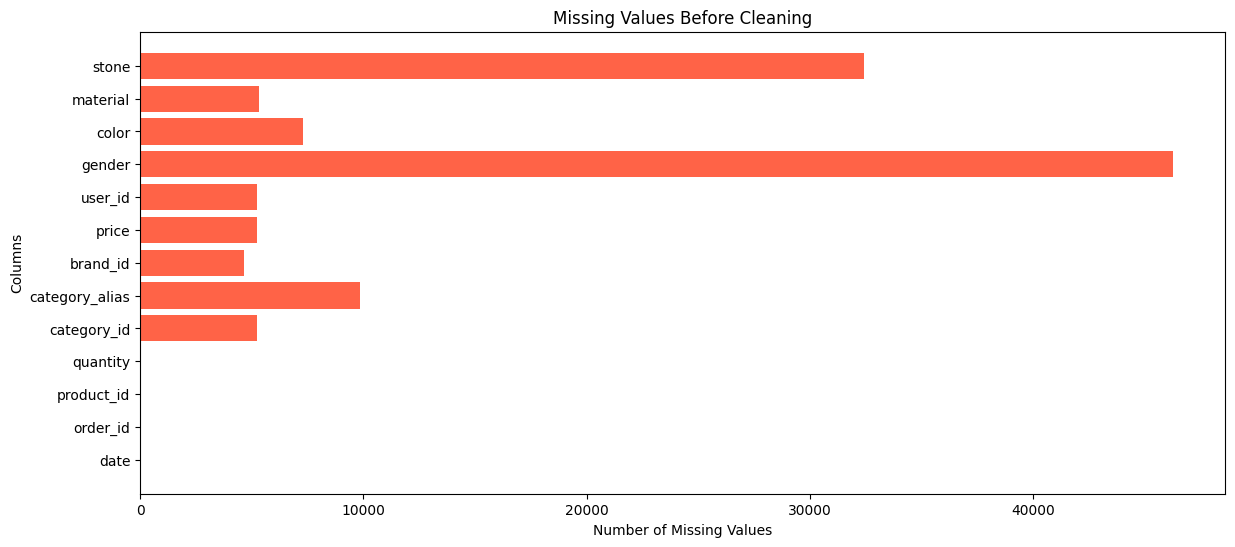

In [37]:
missing_values_kotor = df.isnull().sum()

plt.figure(figsize=(14, 6))
plt.barh(missing_values_kotor.index, missing_values_kotor, color='tomato')
plt.title('Missing Values Before Cleaning')
plt.xlabel('Number of Missing Values')
plt.ylabel('Columns')
plt.show()

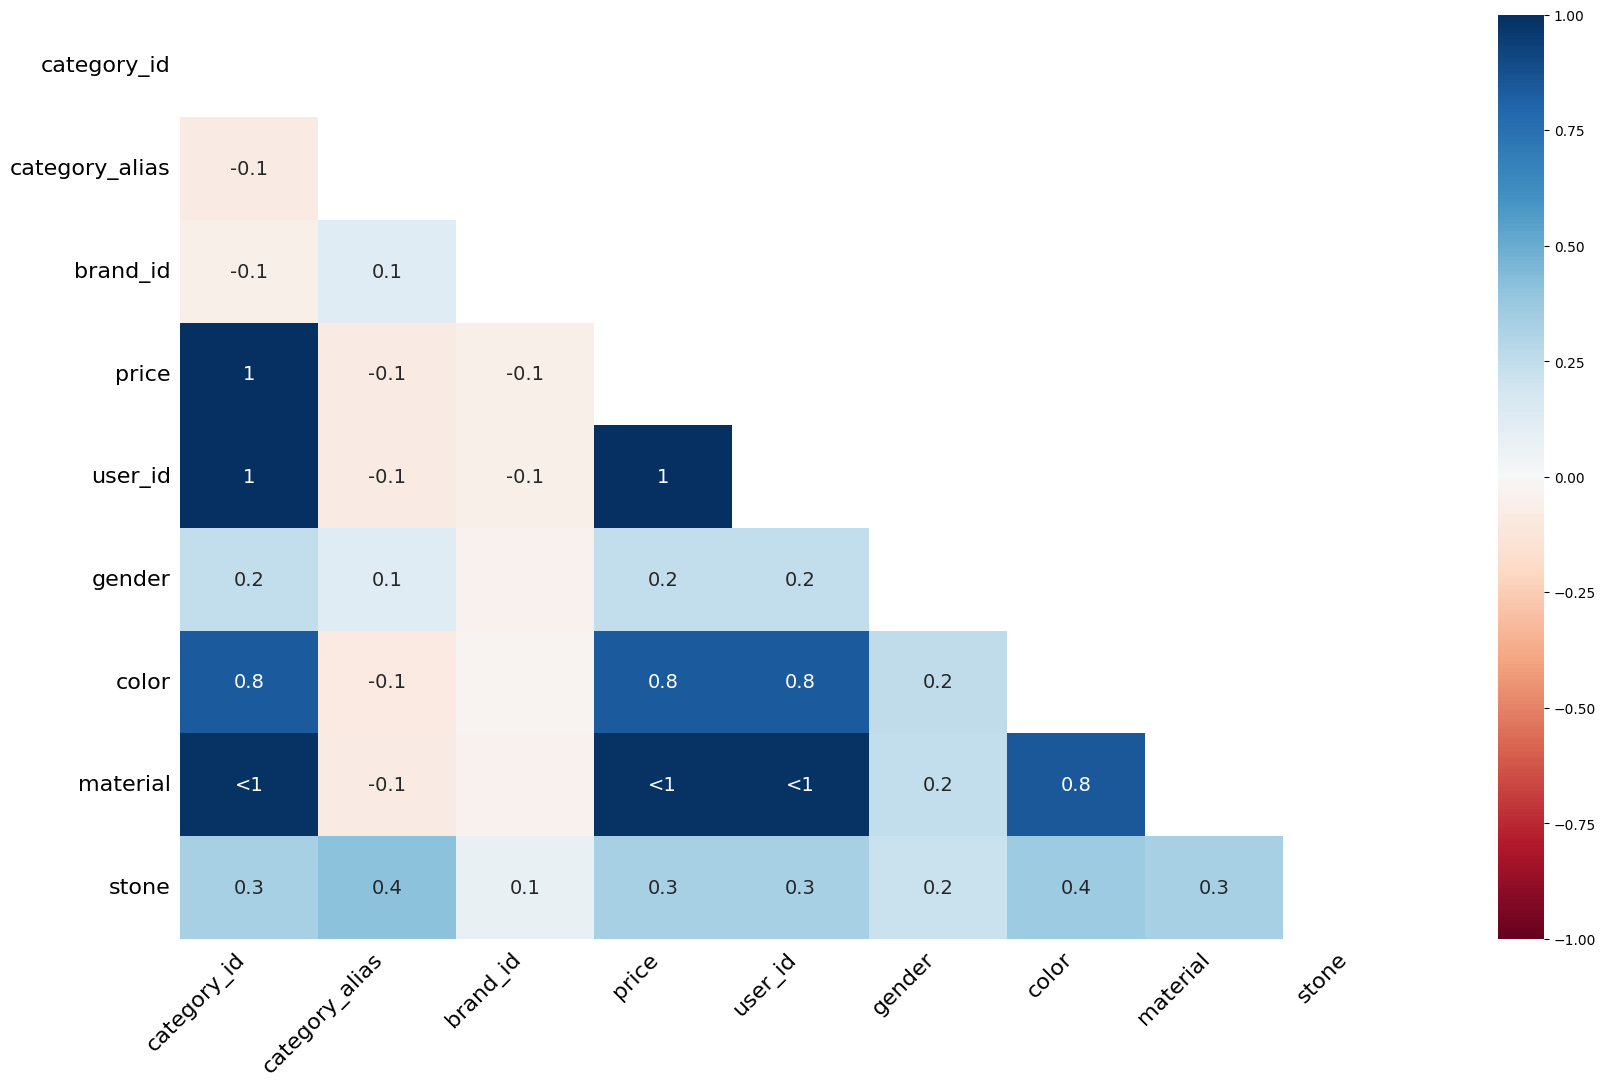

In [38]:
import missingno as msno

msno.heatmap(df)
plt.show()

**Drop rows dengan missing values**

Berdasarkan output coding dan visualisasi barchart dengan heatmap di atas dapat kita simpulkan bahwa:
- `category_id`, `price` dan `category_id`, `user_id`: Terdapat korelasi dalam sebaran data yang hilang antara dua kolom ini. Dapat disimpulkan jika suatu observasi kehilangan nilai pada kolom `category_id`, kemungkinan besar nilai yang hilang juga akan terjadi di kolom `price`, dan sebaliknya. Begitu juga diantara semua kombinasi tiga kolom tersebut. Dari kolom-kolom ini, tidak ada nya `user_id` membuat analisis retensi pelanggan pada data yang missing ini tidak bisa dilakukan karena pembelian tersebut tidak bisa dihubungkan pada pelanggan tertentu, maka semua row yang memiliki null values di kolom ini layak untuk dihilangkan. Sebagai konsekuensi itu, null values di `category_id` dan `price` akan banyak yang terhapus, kalau tidak semua.

- row dengan null values di `category_alias` juga layak untuk dihapus karena kita ingin menggunakan kolom ini untuk mengelompokkan pelanggan, dan dari rincian unique values di atas, tidak ada kolom yang dapat membantu kita untuk _impute_ missing values, sehingga dapat kita _drop_ saja.

- row dengan null values di `gender` dapat dihapus karena tidak ada kolom yang dapat membantu kita untuk _impute_ missing values, dan tidak ada perbedaan signifikan pada row penjualan yang memiliki `gender` null.

In [39]:
df = df.dropna(subset=['user_id', 'gender', 'category_alias'])
df

,date,order_id,product_id,quantity,category_id,category_alias,brand_id,price,user_id,gender,color,material,stone
2,2018-12-02 13:53:42+00:00,1925511016616034733,1842214461889315556,1,1806829201915904347,jewelry.pendant,1,54.66,1515915625048493557,f,white,gold,sapphire
3,2018-12-02 17:44:02+00:00,1925626951238681511,1835566849434059453,1,1806829201915904347,jewelry.pendant,0,88.90,1515915625207630915,f,red,gold,diamond
8,2018-12-03 07:03:49+00:00,1926029494397698277,1811798112444875309,1,1806829201915904347,jewelry.pendant,2,60.27,1515915625234339329,f,red,gold,pearl
19,2018-12-04 19:55:22+00:00,1927142607515812568,1807570270689427678,1,1806829201890738522,jewelry.earring,1,102.60,1515915625227195999,f,yellow,gold,garnet
20,2018-12-04 20:10:22+00:00,1927150150686343971,1806829191581138983,1,1806829201915904347,jewelry.pendant,1,61.51,1515915625227195999,f,yellow,gold,garnet
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95889,2021-12-01 08:57:17+00:00,2718991258755268929,1526046687884214821,1,1806829201890738522,jewelry.earring,1,1308.08,1515915625682928829,f,red,gold,topaz
95897,2021-12-01 09:15:46+00:00,2719000558995243804,1956663848136082144,1,1806829201915904347,jewelry.pendant,1,91.64,1515915625718473081,f,red,gold,fianit
95899,2021-12-01 09:22:17+00:00,2719003834444678075,1956663847615988039,1,1806829201890738522,jewelry.earring,0,265.62,1515915625720351944,f,red,gold,NaN
95900,2021-12-01 09:23:52+00:00,2719004635036648408,1806829194332602450,1,1806829201890738522,jewelry.earring,1,821.78,1515915625717131509,f,red,gold,diamond


In [40]:
# Hitung jumlah missing values dan persentase missing values
missing_values = df.isnull().sum()
missing_percentage = round((missing_values / len(df)) * 100, 2)

# Buat DataFrame untuk informasi missing values
missing_info = pd.DataFrame({
    'Number of Missing Value': missing_values,
    'Percentage of Missing Value': missing_percentage
}).sort_values(by='Percentage of Missing Value', ascending=False)

# Filter baris dengan missing values
missing_info_filtered = missing_info[missing_info['Number of Missing Value'] > 0]

# Tampilkan hasil
print("Informasi Missing Values:")
print(missing_info_filtered)

print(missing_values.sum())

Informasi Missing Values:
          Number of Missing Value  Percentage of Missing Value
stone                        8325                        18.99
brand_id                     2147                         4.90
color                         431                         0.98
material                       19                         0.04
10922


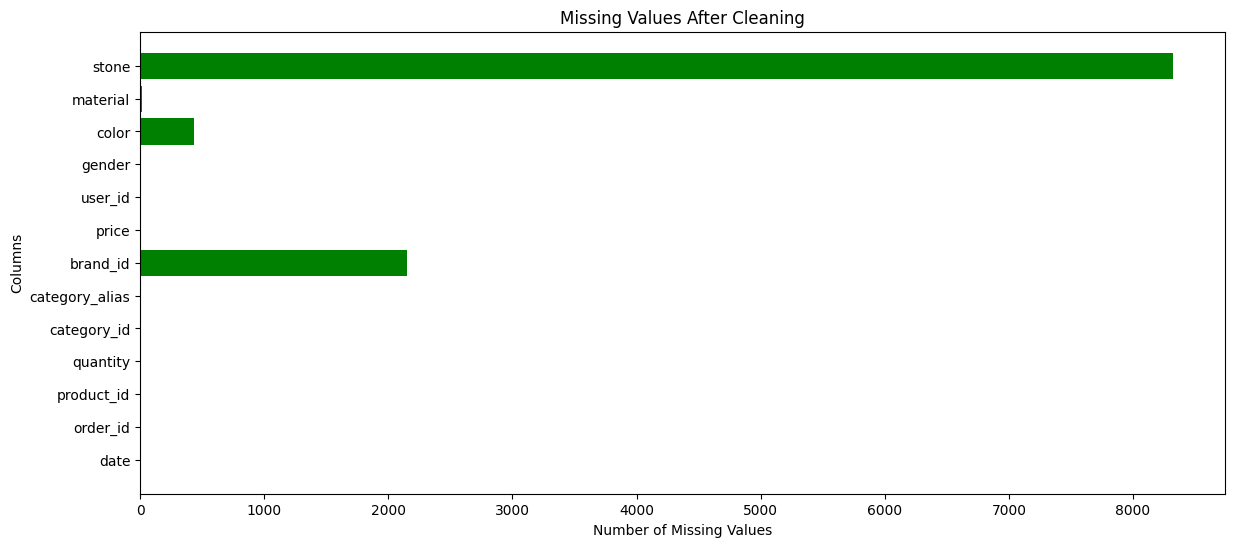

In [41]:
missing_values_bersih = df.isnull().sum()

plt.figure(figsize=(14, 6))
plt.barh(missing_values_kotor.index, missing_values_bersih, color='green')
plt.title('Missing Values After Cleaning')
plt.xlabel('Number of Missing Values')
plt.ylabel('Columns')
plt.show()

In [42]:
df = df.drop(columns=['stone', 'brand_id','color', 'material'], axis=1)

In [43]:
df.head()

,date,order_id,product_id,quantity,category_id,category_alias,price,user_id,gender
2,2018-12-02 13:53:42+00:00,1925511016616034733,1842214461889315556,1,1806829201915904347,jewelry.pendant,54.66,1515915625048493557,f
3,2018-12-02 17:44:02+00:00,1925626951238681511,1835566849434059453,1,1806829201915904347,jewelry.pendant,88.90,1515915625207630915,f
8,2018-12-03 07:03:49+00:00,1926029494397698277,1811798112444875309,1,1806829201915904347,jewelry.pendant,60.27,1515915625234339329,f
19,2018-12-04 19:55:22+00:00,1927142607515812568,1807570270689427678,1,1806829201890738522,jewelry.earring,102.60,1515915625227195999,f
20,2018-12-04 20:10:22+00:00,1927150150686343971,1806829191581138983,1,1806829201915904347,jewelry.pendant,61.51,1515915625227195999,f


Kita lihat bahwa tetap terdapat missing values di kolom `stone`, `brand_id`, `color`, dan `material`. Kolom-kolom ini tidak digunakan untuk cohort analysis, sehingga dapat kita hilangkan dari dataframe.

### Exploratory Data Analysis (EDA)

EDA dilakukan untuk menemukan insight awal tentang ada tersebut seeblum melakukan cohort analysis.

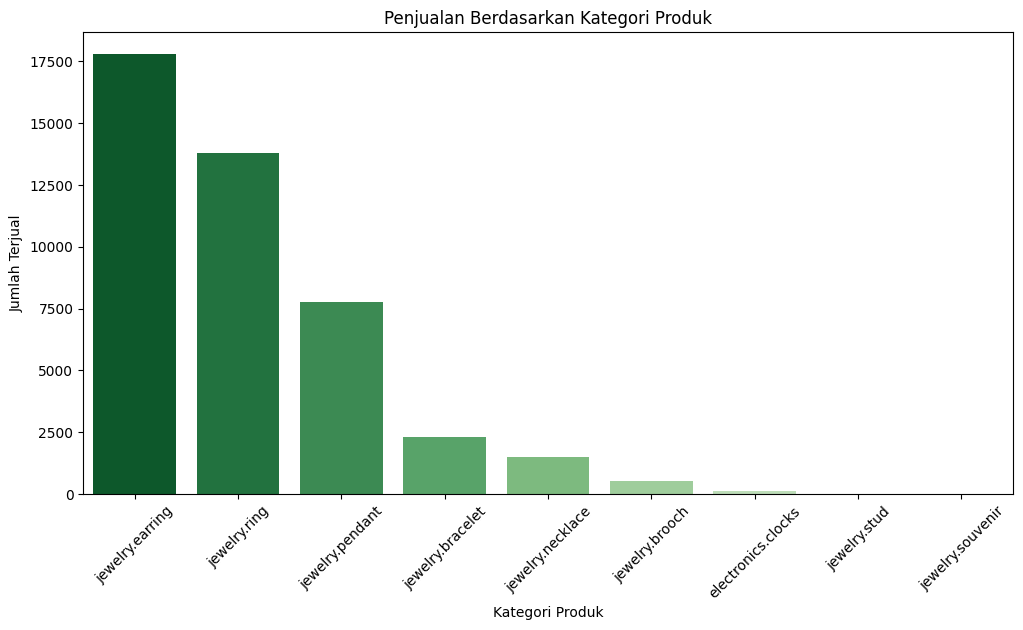

In [81]:

category_counts = df['category_alias'].value_counts() 
palette = sns.color_palette("Greens", len(category_counts))[::-1]

plt.figure(figsize=(12, 6)) 
sns.countplot(x='category_alias', data=df, order=df['category_alias'].value_counts().index, palette=palette) 
plt.title('Penjualan Berdasarkan Kategori Produk') 
plt.xticks(rotation=45) 
plt.ylabel('Jumlah Terjual')
plt.xlabel('Kategori Produk')
plt.show()

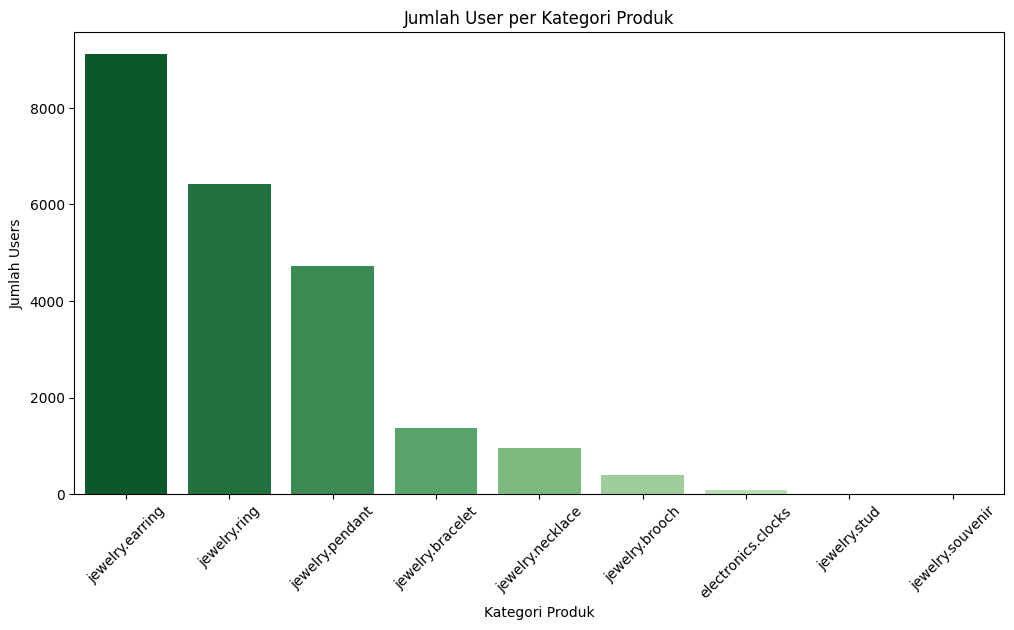

In [77]:
freq_user_cat = df.groupby('category_alias')['user_id'].nunique().reset_index().sort_values('user_id', ascending=False)


pal = sns.color_palette("Greens", len(freq_user_cat))[::-1]
plt.figure(figsize=(12, 6)) 
sns.barplot(data=freq_user_cat, x='category_alias', y='user_id', palette=pal) 
plt.title('Jumlah User per Kategori Produk') 
plt.xlabel('Kategori Produk') 
plt.ylabel('Jumlah Users') 
plt.xticks(rotation=45) 
plt.show()

Dari bar plot di atas, bisa dilihat bahwa trend jumlah penjualan mirip dengan trend jumlah user pada setiap kategori, dengan kategori yang paling besar `jewelry.earring`.

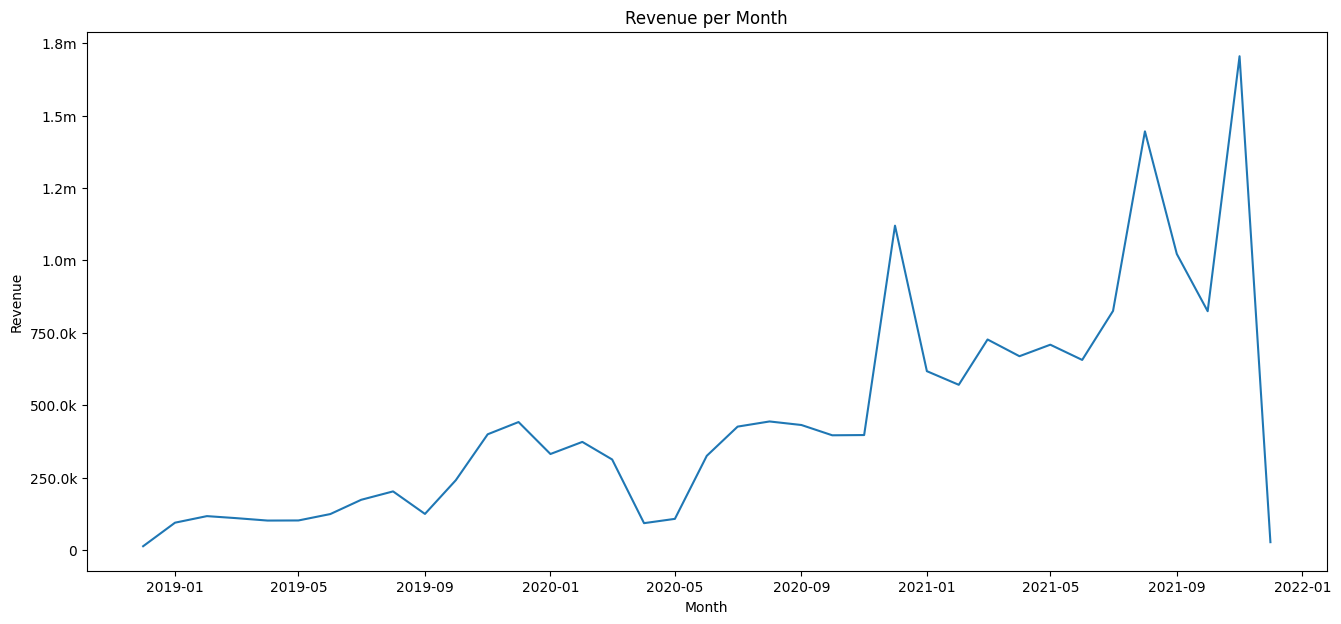

In [46]:
import matplotlib.ticker as ticker
def monthly(x):
    return dt.datetime(x.year, x.month, 1)

def y_fmt(x, pos): 
    if x >= 1e6: 
        return f'{x*1e-6:.1f}m' 
    elif x >= 1e3: 
        return f'{x*1e-3:.1f}k' 
    else: return f'{x:.0f}'
    
profit = df.copy()
profit['Month'] = profit['date'].apply(monthly)

profit = profit.groupby('Month')['price'].sum().reset_index()
profit = profit.rename(columns={'price' : 'Revenue'})
plt.figure(figsize=(16,7))
plt.title('Revenue per Month')
sns.lineplot(x = profit['Month'], y = profit['Revenue'])
ax = plt.gca() 
ax.yaxis.set_major_formatter(ticker.FuncFormatter(y_fmt))
plt.show()

Dari line plot di atas, terlihat bahwa ada trend pembelian yang meningkat pesat pertama di akhir 2020 dan kemudian di pertengahan-akhir 2021

**Menghapus Data sebelum 2019**
Karena kami ingin membandingkan retensi antar quartil, data 2018 dihapus karena hanya terdapat data kurang dari 1 bulan untuk Q4 2018 yang akan mengakibatkan perbandingannya tidak representatif jika dibiarkan. Namun, Q4 2021 memiliki data yang cukup untuk representasi 1 quartil, maka dibiarkan dalam dataframe kami.

In [47]:
df = df[df['date'].dt.year > 2018]

df.to_csv('data_clean.csv', index=False)

# 2. Cohort Analysis per quartile

Berdasarkan domain knowledge, customer tidak cenderung membeli perhiasan pada setiap bulannya, sehingga untuk time-based cohort analysis yang akan dilakukan, kami memilih untuk membagi cohort per quartil (3 bulan).

Untuk membuat data yang tepat untuk visualisasi retensi per kelompok kohort, kita harus mengubah data mentah menjadi:
    
> cohort_month | current_month | count_user | period_distance |

1. **cohort_month_q** : Quartil Bulan aktivitas pertama pelanggan melakukan transaksi (first transaction month)
1. **current_month** : Quartil Bulan observasi/Quartil Bulan terakhir data diambil
1. **count_user** : Banyak pelanggan berdasarkan kelompok cohort_month_q dan period_distance
1. **period_distance** : Jarak antara cohort_month_q dengan current_month_q

In [48]:
retention = df.copy()
retention['cohort_month_q'] = retention.groupby('user_id')['date'].transform('min').dt.year.astype(str) + " Q" + (retention.groupby('user_id')['date'].transform('min').dt.quarter).astype(str)
retention

,date,order_id,product_id,quantity,category_id,category_alias,price,user_id,gender,cohort_month_q
122,2019-01-03 08:18:18+00:00,1948535029260878257,1892882039615520978,1,1806829201882349913,jewelry.ring,2034.21,1515915625078636725,f,2019 Q1
123,2019-01-03 13:39:43+00:00,1948696803582935276,1806829189156831241,1,1806829201882349913,jewelry.ring,1199.96,1515915625086525590,f,2019 Q1
124,2019-01-04 10:12:30+00:00,1949317289035695031,1533189397292253673,1,1806829202008179041,electronics.clocks,177.40,1515915625221699316,f,2019 Q1
126,2019-01-04 12:00:01+00:00,1949371405128696384,1842214461889315556,1,1806829201915904347,jewelry.pendant,54.66,1515915625048493557,f,2019 Q1
129,2019-01-06 08:09:05+00:00,1950704715977195970,1857305206627237989,1,1806829201915904347,jewelry.pendant,35.84,1515915625192894657,f,2019 Q1
...,...,...,...,...,...,...,...,...,...,...
95889,2021-12-01 08:57:17+00:00,2718991258755268929,1526046687884214821,1,1806829201890738522,jewelry.earring,1308.08,1515915625682928829,f,2021 Q4
95897,2021-12-01 09:15:46+00:00,2719000558995243804,1956663848136082144,1,1806829201915904347,jewelry.pendant,91.64,1515915625718473081,f,2021 Q4
95899,2021-12-01 09:22:17+00:00,2719003834444678075,1956663847615988039,1,1806829201890738522,jewelry.earring,265.62,1515915625720351944,f,2021 Q4
95900,2021-12-01 09:23:52+00:00,2719004635036648408,1806829194332602450,1,1806829201890738522,jewelry.earring,821.78,1515915625717131509,f,2021 Q4


In [49]:
retention['current_transaction_q'] = retention['date'].dt.year.astype(str) + " Q" + round((retention['date'].dt.month-1)//3 + 1).astype(str)
retention = retention[['user_id', 'cohort_month_q', 'current_transaction_q']]
retention.drop_duplicates(inplace=True)
retention

,user_id,cohort_month_q,current_transaction_q
122,1515915625078636725,2019 Q1,2019 Q1
123,1515915625086525590,2019 Q1,2019 Q1
124,1515915625221699316,2019 Q1,2019 Q1
126,1515915625048493557,2019 Q1,2019 Q1
129,1515915625192894657,2019 Q1,2019 Q1
...,...,...,...
95882,1515915625538828737,2021 Q4,2021 Q4
95888,1515915625720339837,2021 Q4,2021 Q4
95897,1515915625718473081,2021 Q4,2021 Q4
95899,1515915625720351944,2021 Q4,2021 Q4


In [ ]:
cohort_retention = retention.groupby(['cohort_month_q', 'current_transaction_q'])[['user_id']].count().reset_index().rename(columns={'user_id': 'count_user'})
cohort_retention

,cohort_month_q,current_transaction_q,count_user
0,2019 Q1,2019 Q1,387
1,2019 Q1,2019 Q2,69
2,2019 Q1,2019 Q3,68
3,2019 Q1,2019 Q4,97
4,2019 Q1,2020 Q1,73
...,...,...,...
73,2021 Q2,2021 Q3,121
74,2021 Q2,2021 Q4,49
75,2021 Q3,2021 Q3,3120
76,2021 Q3,2021 Q4,140


In [51]:
def convert_quarter_to_date(quarter):
    year, q = quarter.split()
    year = int(year)
    quarter = int(q[1])
    
    # Menentukan bulan pertama dari kuartal
    if quarter == 1:
        return pd.Timestamp(f'{year}-01-01')
    elif quarter == 2:
        return pd.Timestamp(f'{year}-04-01')
    elif quarter == 3:
        return pd.Timestamp(f'{year}-07-01')
    elif quarter == 4:
        return pd.Timestamp(f'{year}-10-01')

# Mengonversi kuartal ke tanggal
cohort_retention['cohort_date'] = cohort_retention['cohort_month_q'].apply(convert_quarter_to_date)
cohort_retention['transaction_date'] = cohort_retention['current_transaction_q'].apply(convert_quarter_to_date)

# Menghitung period distance (selisih kuartal)
cohort_retention['period_distance'] = ((cohort_retention['transaction_date'].dt.year - cohort_retention['cohort_date'].dt.year) * 4 + 
                                  (cohort_retention['transaction_date'].dt.month - cohort_retention['cohort_date'].dt.month) // 3)
cohort_retention

,cohort_month_q,current_transaction_q,count_user,cohort_date,transaction_date,period_distance
0,2019 Q1,2019 Q1,387,2019-01-01,2019-01-01,0
1,2019 Q1,2019 Q2,69,2019-01-01,2019-04-01,1
2,2019 Q1,2019 Q3,68,2019-01-01,2019-07-01,2
3,2019 Q1,2019 Q4,97,2019-01-01,2019-10-01,3
4,2019 Q1,2020 Q1,73,2019-01-01,2020-01-01,4
...,...,...,...,...,...,...
73,2021 Q2,2021 Q3,121,2021-04-01,2021-07-01,1
74,2021 Q2,2021 Q4,49,2021-04-01,2021-10-01,2
75,2021 Q3,2021 Q3,3120,2021-07-01,2021-07-01,0
76,2021 Q3,2021 Q4,140,2021-07-01,2021-10-01,1


In [52]:
cohort_retention_pivot = cohort_retention.pivot_table(
    index='cohort_month_q',
    columns='period_distance',
    values='count_user',
    aggfunc='sum'
)

cohort_retention_pivot

period_distance,0,1,2,3,4,5,6,7,8,9,10,11
cohort_month_q,,,,,,,,,,,,
2019 Q1,387.0,69.0,68.0,97.0,73.0,29.0,58.0,62.0,45.0,42.0,47.0,36.0
2019 Q2,307.0,40.0,67.0,53.0,18.0,43.0,28.0,21.0,22.0,21.0,11.0,NaN
2019 Q3,395.0,86.0,59.0,18.0,40.0,40.0,25.0,17.0,21.0,11.0,NaN,NaN
2019 Q4,801.0,152.0,40.0,68.0,90.0,43.0,46.0,34.0,34.0,NaN,NaN,NaN
2020 Q1,792.0,66.0,86.0,90.0,58.0,53.0,53.0,27.0,NaN,NaN,NaN,NaN
2020 Q2,584.0,54.0,40.0,31.0,27.0,15.0,14.0,NaN,NaN,NaN,NaN,NaN
2020 Q3,863.0,112.0,53.0,50.0,41.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN
2020 Q4,2750.0,131.0,55.0,49.0,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021 Q1,3189.0,91.0,68.0,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
cohort_retention_final = cohort_retention_pivot.divide(cohort_retention_pivot.iloc[:,0], axis=0)

cohort_retention_final

period_distance,0,1,2,3,4,5,6,7,8,9,10,11
cohort_month_q,,,,,,,,,,,,
2019 Q1,1.0,0.178295,0.175711,0.250646,0.188630,0.074935,0.149871,0.160207,0.116279,0.108527,0.121447,0.093023
2019 Q2,1.0,0.130293,0.218241,0.172638,0.058632,0.140065,0.091205,0.068404,0.071661,0.068404,0.035831,NaN
2019 Q3,1.0,0.217722,0.149367,0.045570,0.101266,0.101266,0.063291,0.043038,0.053165,0.027848,NaN,NaN
2019 Q4,1.0,0.189763,0.049938,0.084894,0.112360,0.053683,0.057428,0.042447,0.042447,NaN,NaN,NaN
2020 Q1,1.0,0.083333,0.108586,0.113636,0.073232,0.066919,0.066919,0.034091,NaN,NaN,NaN,NaN
2020 Q2,1.0,0.092466,0.068493,0.053082,0.046233,0.025685,0.023973,NaN,NaN,NaN,NaN,NaN
2020 Q3,1.0,0.129780,0.061414,0.057937,0.047509,0.026651,NaN,NaN,NaN,NaN,NaN,NaN
2020 Q4,1.0,0.047636,0.020000,0.017818,0.010909,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021 Q1,1.0,0.028536,0.021323,0.013484,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


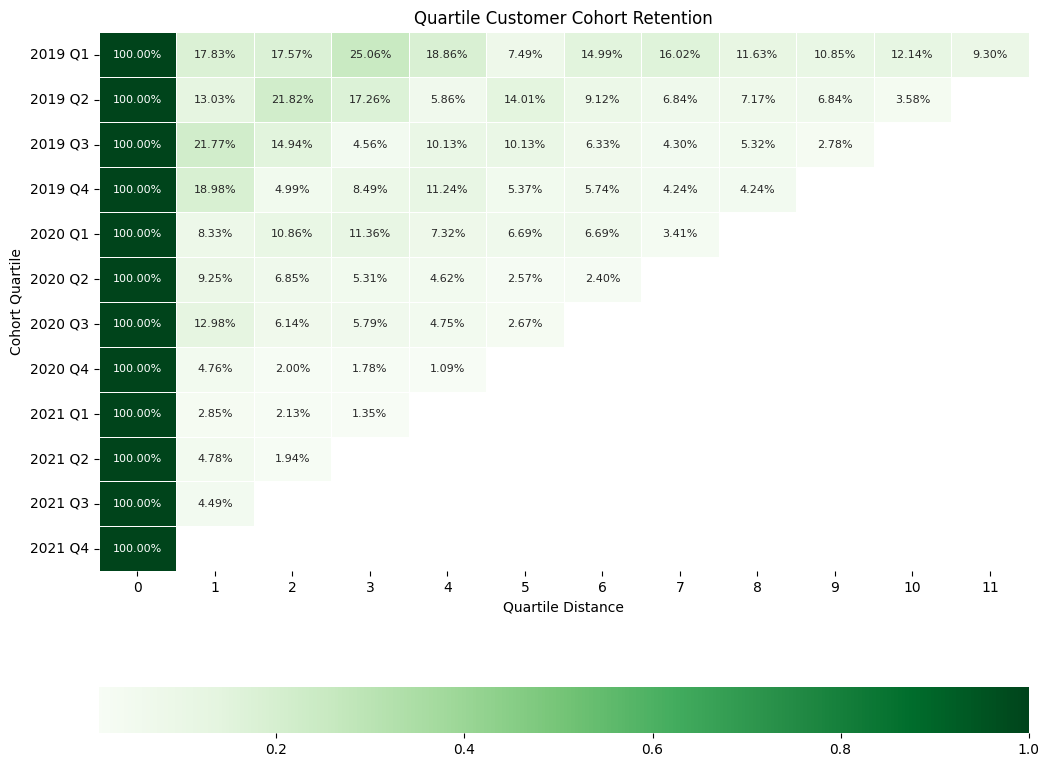

In [54]:
plt.figure(figsize=(12, 10))
sns.heatmap(cohort_retention_final, annot=True, cmap="Greens",
           cbar_kws={'orientation':'horizontal'}, fmt=".2%",annot_kws=dict(size=8), linewidths=0.5)
plt.title('Quartile Customer Cohort Retention')
plt.xlabel('Quartile Distance')
plt.ylabel('Cohort Quartile')
plt.show()

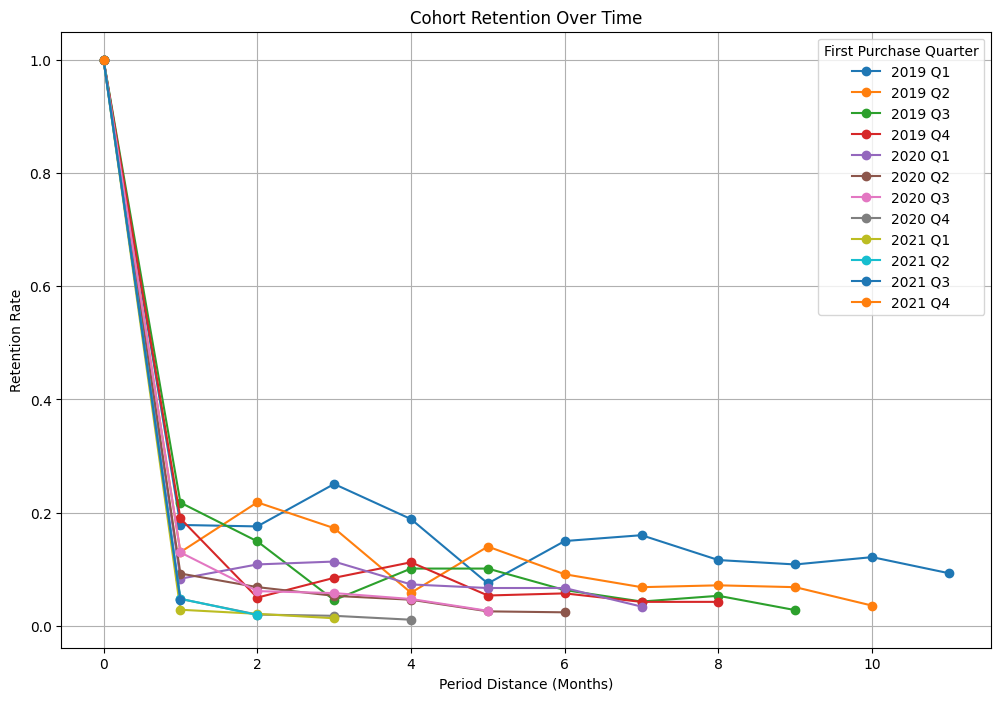

In [55]:
retention_line = cohort_retention_final.copy().T


# Membuat plot
plt.figure(figsize=(12, 8))
for cohort in retention_line.columns:
    plt.plot(retention_line.index, retention_line[cohort], marker='o', label=cohort)

# Menambahkan judul dan label
plt.title('Cohort Retention Over Time')
plt.xlabel('Period Distance (Months)')
plt.ylabel('Retention Rate')
plt.legend(title='First Purchase Quarter')
plt.grid(True)
plt.show()

## Insight dan Solusi untuk Cohort Retention di Online Jewelry Store

### Insights dari Analisis Cohort Retention

*   **Tren menurun drastis:** Retensi pengguna turun tajam setelah bulan pertama (100%), yang merupakan fenomena umum dalam analisis retensi. Hal ini menunjukkan sebagian besar pelanggan melakukan pembelian sekali saja dan tidak kembali untuk pembelian berikutnya.
*   **Retensi jangka panjang terbatas:** Hanya sedikit cohort yang memiliki retensi di periode-periode selanjutnya (terlihat pada kolom ke-6 ke atas). Misalnya, **Cohort 2019 Q1** mempertahankan retensi sebesar 9.30% di bulan ke-11.
*   **2020 Q1** dan **2020 Q3** masih menunjukkan retensi di awal periode (sekitar 8%-13%) tetapi tidak bertahan lama.
*   **Q1 Cohorts** (awal tahun) cenderung memiliki retensi lebih baik dibanding Q2, Q3, dan Q4. Hal ini mungkin berkaitan dengan **musim liburan, promo awal tahun, atau tren pembelian perhiasan**.
*  Cohort **Q1 2019** memiliki retensi tertinggi secara konsisten, yang dapat dikaitkan dengan faktor seperti promosi atau strategi pemasaran yang efektif di awal 2019.

*  Cohort yang lebih baru, terutama di 2021, menunjukkan retensi yang semakin rendah, menandakan potensi permasalahan seperti strategi akuisisi pengguna yang kurang efektif atau penurunan kepuasan pelanggan.

*   **Q1 2020 dan Q1 2021** menunjukkan retensi yang lebih rendah dibandingkan cohort Q1 tahun sebelumnya (2019). Pandemi COVID-19 menyebabkan penurunan daya beli dan perubahan perilaku konsumen, termasuk fokus pada kebutuhan dasar serta pengurangan pembelian barang mewah seperti perhiasan.



### Solusi untuk meningkatkan Retensi Customer

1.  **Manfaatkan Event Musiman**:
    *   Fokus pada kampanye ulang tahun, Valentine, Ramadan, dan musim pernikahan.
    *   Lakukan program follow-up setelah pembelian event besar untuk meningkatkan retensi.
2.  **Strategi Retensi Pascapandemi**:
    *   Sediakan opsi cicilan atau diskon loyalitas bagi pelanggan lama untuk menyesuaikan daya beli.
3.  **Kampanye Tengah Tahun**:
    *   Perkuat strategi pemasaran di Q2 dan Q3 dengan menciptakan event promosi, misalnya "Mid-Year Exclusive Jewelry Sale".
4.  **Engagement Setelah Q4**:
    *   Buat program khusus setelah Natal atau Tahun Baru, seperti diskon ulang tahun pelanggan atau program loyalty points.

# 3. Cohort Analysis by category per quartile

Berdasarkan EDA yang dilakukan, kami dapat mengidentifikasi 3 kategori produk dengan penjualan tertinggi serta jumlah pelanggan yang tertinggi, kita dapat menganalisis cohort retention customer berdasarkan produk-produk tersebut untuk melihat apakah ada perbedaan tren retensi pada pelanggan yang membeli produk tertentu dibandingkan keseluruhan customer.

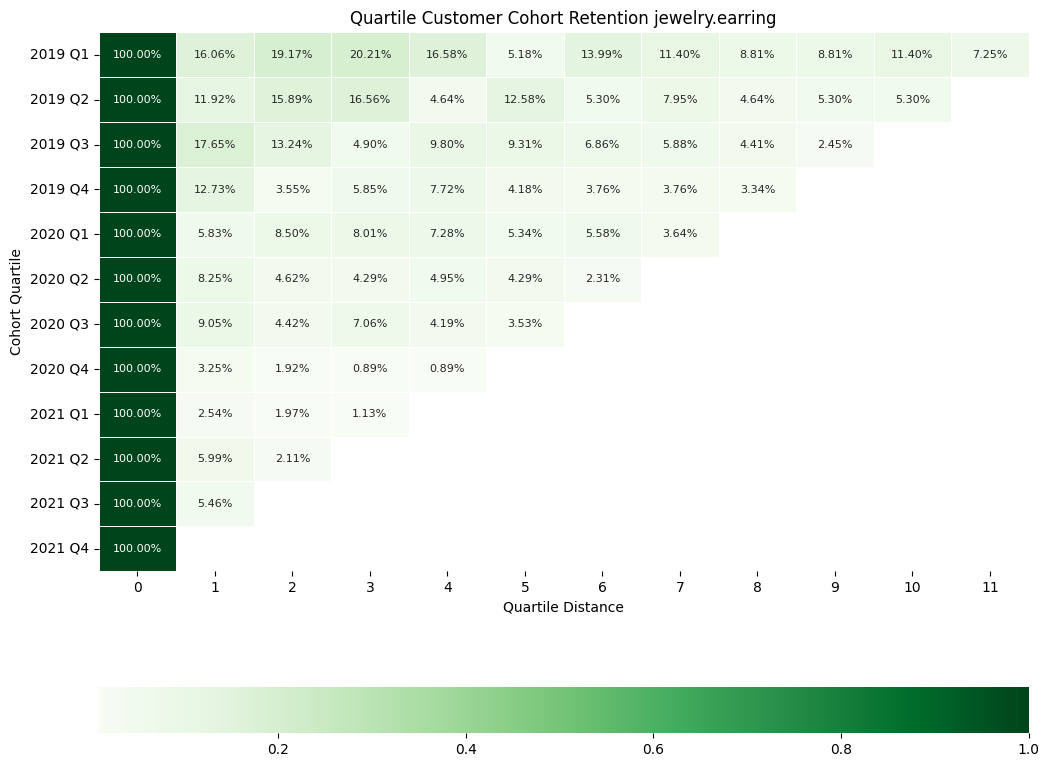

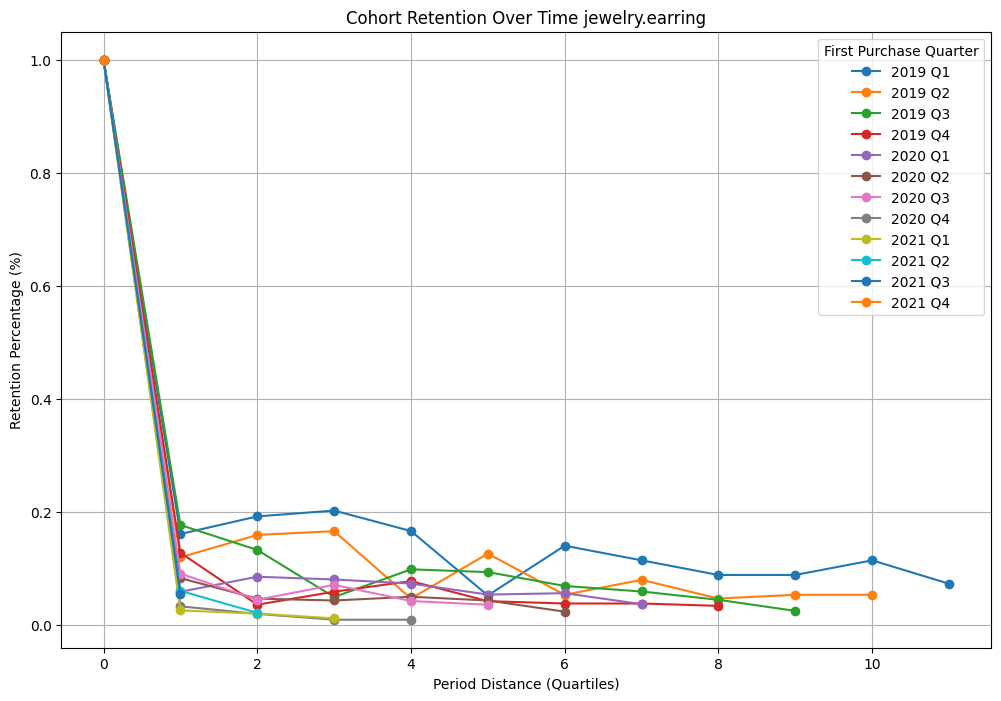

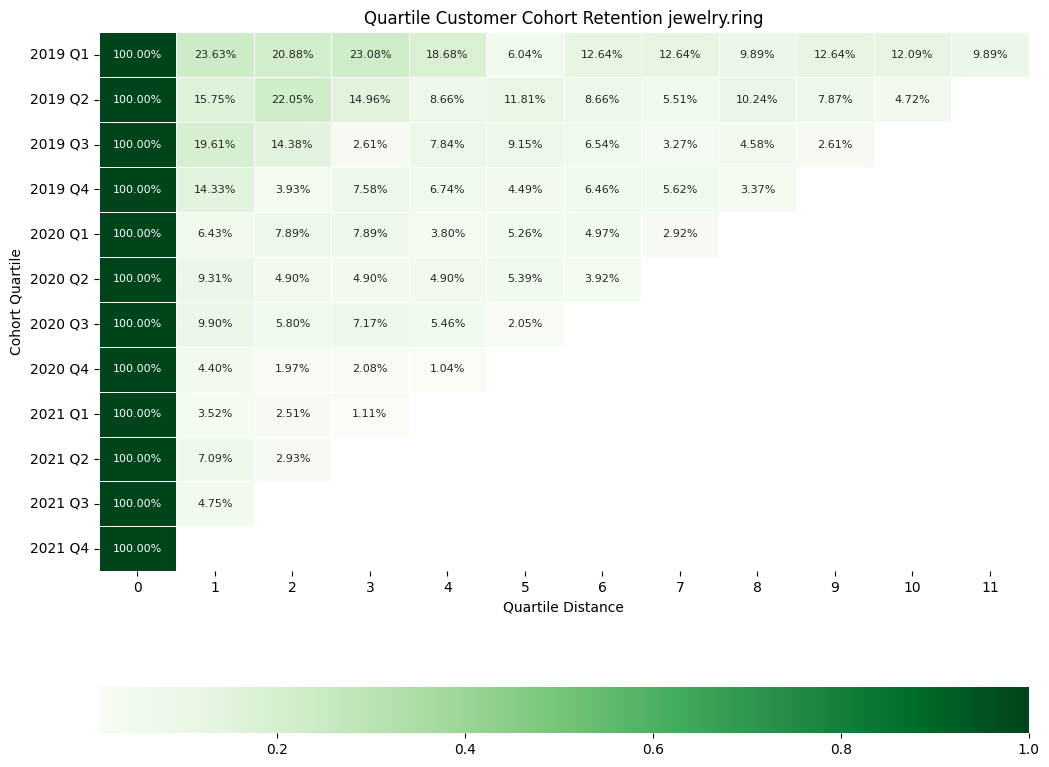

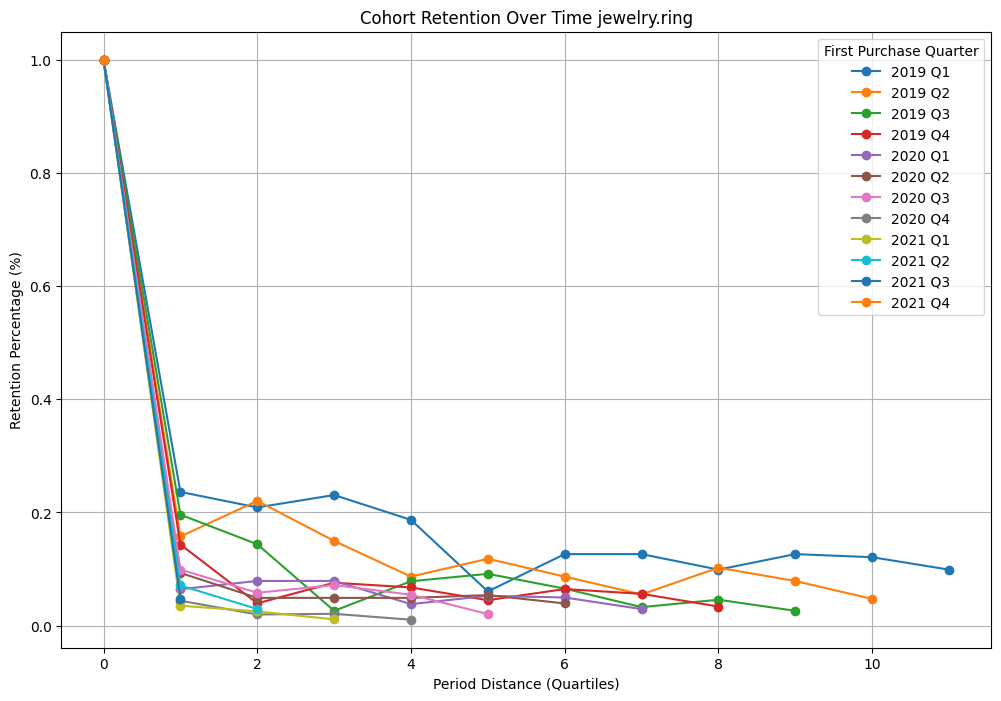

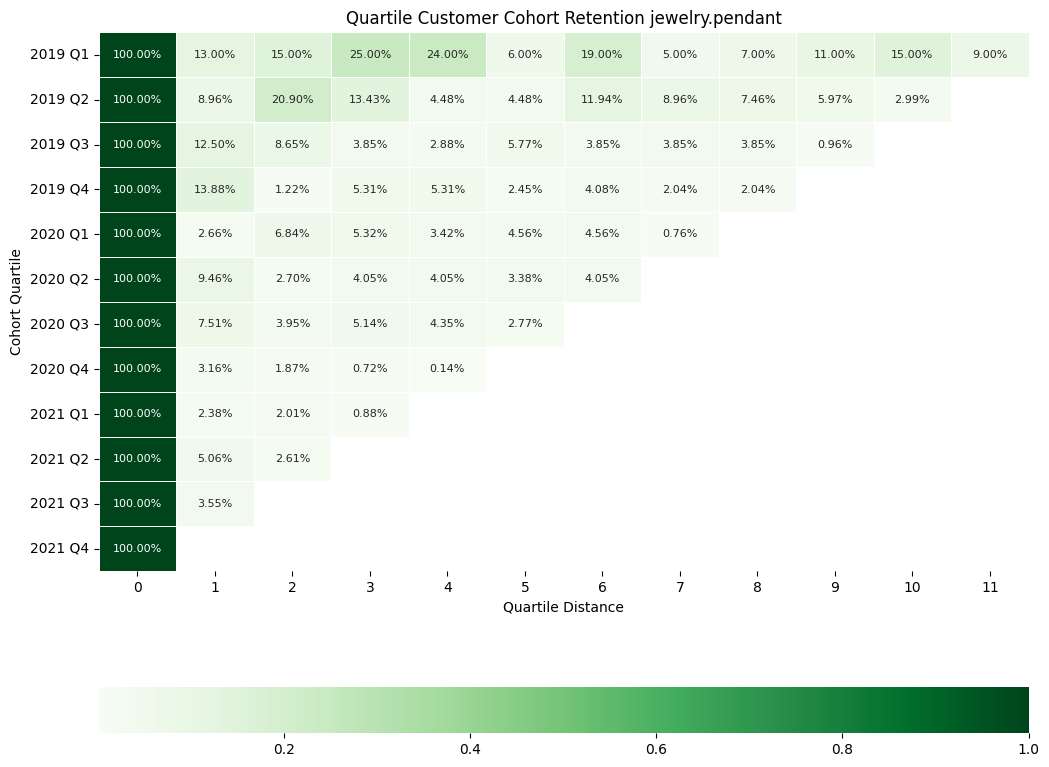

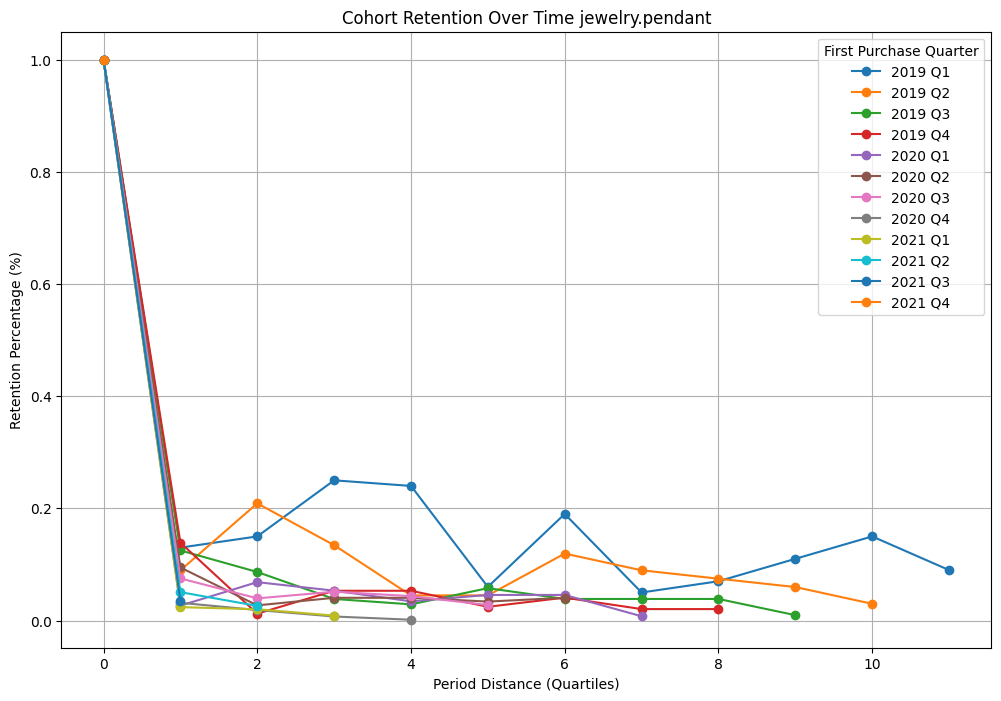

In [56]:
def convert_quarter_to_date(quarter):
    year, q = quarter.split()
    year = int(year)
    quarter = int(q[1])

    # Menentukan bulan pertama dari kuartal
    if quarter == 1:
        return pd.Timestamp(f'{year}-01-01')
    elif quarter == 2:
        return pd.Timestamp(f'{year}-04-01')
    elif quarter == 3:
        return pd.Timestamp(f'{year}-07-01')
    elif quarter == 4:
        return pd.Timestamp(f'{year}-10-01')
    
list_category = ['jewelry.earring','jewelry.ring', 'jewelry.pendant']
for cat in list_category:    
    retention_category = df[df['category_alias']==cat].copy()
    retention_category['cohort_month_q'] = retention_category.groupby('user_id')['date'].transform('min').dt.year.astype(str) + " Q" + (retention_category.groupby('user_id')['date'].transform('min').dt.quarter).astype(str)
    # display(retention_category)
    retention_category['current_transaction_month'] = retention_category['date'].dt.to_period('M')
    retention_category['current_transaction_q'] = retention_category['date'].dt.year.astype(str) + " Q" + round((retention_category['date'].dt.month-1)//3 + 1).astype(str)
    retention_category = retention_category[['user_id', 'cohort_month_q', 'current_transaction_q']]
    retention_category.drop_duplicates(inplace=True)
    # display(retention_category)
    cohort_retention_category = retention_category.groupby(['cohort_month_q', 'current_transaction_q'])[['user_id']].count().reset_index().rename(columns={'user_id': 'count_user'})
    # display(cohort_retention_category)

    cohort_retention_category['cohort_date'] = cohort_retention_category['cohort_month_q'].apply(convert_quarter_to_date)
    cohort_retention_category['transaction_date'] = cohort_retention_category['current_transaction_q'].apply(convert_quarter_to_date)

    # Menghitung period distance (selisih kuartal)
    cohort_retention_category['period_distance'] = ((cohort_retention_category['transaction_date'].dt.year - cohort_retention_category['cohort_date'].dt.year) * 4 + 
                                    (cohort_retention_category['transaction_date'].dt.month - cohort_retention_category['cohort_date'].dt.month) // 3)
    # display(cohort_retention_category)
    cohort_retention_category_pivot = cohort_retention_category.pivot_table(
        index='cohort_month_q',
        columns='period_distance',
        values='count_user',
        aggfunc='sum'
    )

    # display(cohort_retention_category_pivot)
    
    cohort_retention_category_final = cohort_retention_category_pivot.divide(cohort_retention_category_pivot.iloc[:,0], axis=0)

    
    plt.figure(figsize=(12, 10))
    sns.heatmap(cohort_retention_category_final, annot=True, cmap="Greens",
            cbar_kws={'orientation':'horizontal'}, fmt=".2%",annot_kws=dict(size=8), linewidths=0.5)
    plt.title('Quartile Customer Cohort Retention ' + cat)
    plt.xlabel('Quartile Distance')
    plt.ylabel('Cohort Quartile')
    plt.show()
    
    retention_category_line = cohort_retention_category_final.copy().T
    # display(retention_category_line)

    plt.figure(figsize=(12, 8))
    for cohort in retention_category_line.columns:
        plt.plot(retention_category_line.index, retention_category_line[cohort], marker='o', label=cohort)
            


    plt.title('Cohort Retention Over Time ' + cat)
    plt.xlabel('Period Distance (Quartiles)')
    plt.ylabel('Retention Percentage (%)')
    plt.legend(title='First Purchase Quarter')
    plt.grid(True)
    plt.show()

Dari heatmap dan line plot di atas, dapat dilihat bahwa tren retensi secara garis besar mengikuti tren semua kategori produk secara keseluruhan, sehingga tidak terdapat insight tambahan dari cohort analysis per produk.